<a href="https://colab.research.google.com/github/Srydv/BCS_Workshop_Apr_20/blob/master/ML_180740.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/bcs-iitk/BCS_Workshop_Apr_20/blob/master/Machine_Learning/Assignment/ML.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/bcs-iitk/BCS_Workshop_Apr_20/blob/master/Machine_Learning/Assignment/ML.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://github.com/bcs-iitk/BCS_Workshop_Apr_20/raw/master/Machine_Learning/Assignment/ML.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

In [0]:
# Copyright (c) 2020 Brain and Cognitive Society, IIT Kanpur [ BCS @IITK ]
# Copyright under MIT License, must reference https://github.com/bcs-iitk/BCS_Workshop_Apr_20 if used anywhere else.
# Author: Shashi Kant (http://shashikg.github.io/)



> Note: Do not forget to click on **Copy to Drive** in Google Colab to save a copy of this assignment.

![copy2drive](https://github.com/bcs-iitk/BCS_Workshop_Apr_20/raw/master/Machine_Learning/Assignment/copy2drive.png)



# Assignment 1: Machine Learning


## Question 1: Linear Regression
To check whether you are able to build simple linear regression model from scratch or not.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

!wget --no-check-certificate https://github.com/bcs-iitk/BCS_Workshop_Apr_20/raw/master/Machine_Learning/Assignment/X.npy -O X.npy
!wget --no-check-certificate https://github.com/bcs-iitk/BCS_Workshop_Apr_20/raw/master/Machine_Learning/Assignment/y.npy -O y.npy

--2020-04-05 20:29:57--  https://github.com/bcs-iitk/BCS_Workshop_Apr_20/raw/master/Machine_Learning/Assignment/X.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bcs-iitk/BCS_Workshop_Apr_20/master/Machine_Learning/Assignment/X.npy [following]
--2020-04-05 20:29:57--  https://raw.githubusercontent.com/bcs-iitk/BCS_Workshop_Apr_20/master/Machine_Learning/Assignment/X.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 528 [application/octet-stream]
Saving to: ‘X.npy’

X.npy               100%[===================>]     528  --.-KB/s    in 0s      

2020-04-05 20:29:57 (60.4 MB/s) - ‘X.npy’ saved [5

In [0]:
def load_data_LR():
  # Implement this function to read the dataset using the path declared in path_X and path_y
  # should return the X and y data
  # use np.load() to load the data google it you will get to know how to do it

  path_X = "X.npy"
  path_y = "y.npy"

  # Write your code here ----------
  X=np.load(path_X)
  y=np.load(path_y)

  return X, y

In [0]:
def get_linear_model(X, y):
  # This shoudl return a proper linear model without bias of type y = XW

  # Write your code here ----------
  D=X.shape[1]
  out_shape=y.shape[1]
  # -------------------------------
  
  W = np.random.randn(D, out_shape)

  return W

In [0]:
def MSE(y, y_pred):
  # should return the mean square error between the actual y and predicted y

  # Write your code here ----------
  #X, y = load_data_LR()
  #W = get_linear_model(X, y)
  
  f = (y_pred-y)**2
  errS=sum(f)
  error=errS/(2*len(y))

 # -------------------------------

  return error

In [0]:
def train_by_algebra(X, y):
  # should return the trained weight 'W' using the linear algebra method i.e. setting dE/dW = 0

  # Write your code here ----------
  X, y = load_data_LR()
  Xt = np.transpose(X)
  XtXinv = np.linalg.pinv(np.matmul(Xt,X))
  V = np.matmul(XtXinv,Xt)
  W = np.matmul(V,y)
  # -------------------------------
  return W

In [0]:
def train_by_GD(X, y, epochs=5, lr=0.01):
  # should return the trained weight 'W' using the gradient descent for number of iterations equals to epochs
  # should also return error history int the cariable error_hist.shape = (epochs,); error_hist[i] = mean square error after epoch i-1
  # should also print mean square error after each epoch/ iteration
  # lr = "learning rate" i.e. eta
  
  # Write your code here ----------
  X, y = load_data_LR()
  W = get_linear_model(X, y)
  y_pred = X*W
  error_hist = np.zeros((epochs,))
  for i in range(epochs):
    
    W = W - (lr*sum((y_pred-y)*X))/len(y)
    y_pred = X*W
    error_hist[i] = sum((y_pred-y)**2)/(2*len(y))
    print('MSE after epoch ', i+1,' = ',error_hist[i])
  return W, error_hist

### Now write a complete code using the function defined above to learn the model for following cases:

##### Learn **W** using linear algebra method and prints mean square error between actual y and predicted y. Use `y_pred = XW`. Also plot y_pred and y on different plots.

Mean Square error: [2.74502991]


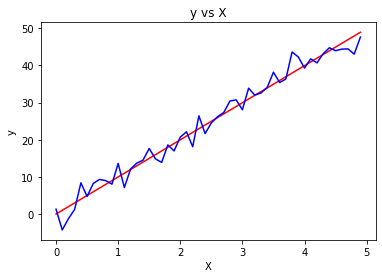

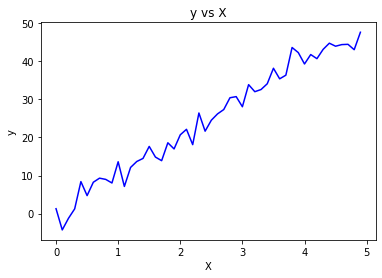

In [0]:
# Write your code here ----------
X, y = load_data_LR()
W = train_by_algebra(X, y)
y_pred = X*W
print('Mean Square error:',MSE(y, y_pred))

#plt.subplot(1,2,1)
plt.plot(X,y_pred,label="y_pred", 'r',X,y, label="y", 'b')
plt.title('y vs X')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

#plt.subplot(1,2,2)
plt.plot(X,y,'b')
plt.title('y vs X')
plt.xlabel('X')
plt.ylabel('y')
plt.show()
# -------------------------------

##### Learn **W** using gradient descent method for following learning rates, `lr = [0.01, 0.001, 0.0001]` for **10 epochs**. Plot **MSE vs epochs** for each of them.  Also plot y_pred and y on different plots.

MSE after epoch  1  =  381.6311145894495
MSE after epoch  2  =  322.8419078914936
MSE after epoch  3  =  273.1746271864174
MSE after epoch  4  =  231.21388454005336
MSE after epoch  5  =  195.76390824903316
MSE after epoch  6  =  165.81446646662494
MSE after epoch  7  =  140.51207823047062
MSE after epoch  8  =  119.13569148161552
MSE after epoch  9  =  101.0761349618203
MSE after epoch  10  =  85.818758421833
MSE after epoch  11  =  72.92876643184172
MSE after epoch  12  =  62.03882784596628
MSE after epoch  13  =  52.83860782284896
MSE after epoch  14  =  45.06592409223967
MSE after epoch  15  =  38.499275444242606
MSE after epoch  16  =  32.95152952265973
MSE after epoch  17  =  28.264590041006905
MSE after epoch  18  =  24.304891450771503
MSE after epoch  19  =  20.959592671709153
MSE after epoch  20  =  18.13336141542286
MSE after epoch  21  =  15.745657463834872
MSE after epoch  22  =  13.728437483075005
MSE after epoch  23  =  12.024215965968324
MSE after epoch  24  =  10.584427

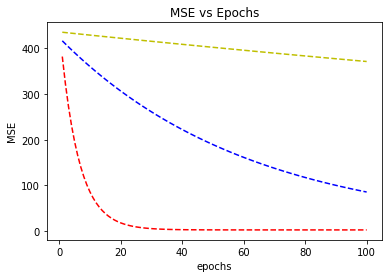

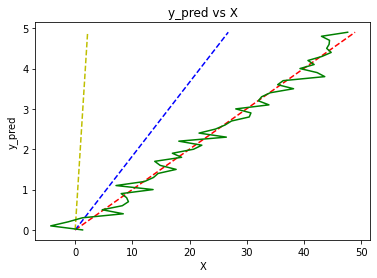

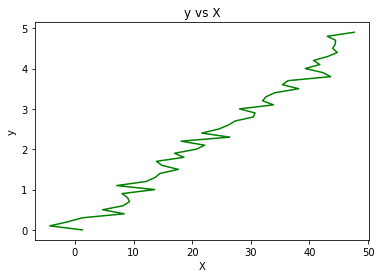

W =  [9.9839087]
W =  [5.45964395]
W =  [0.44386016]


In [0]:
temp, tmp = load_data_LR()
X = np.zeros((1,50))
y = np.zeros((1,50))
for i in range(50):
  X[0][i] = temp[i][0]
  y[0][i] = tmp[i][0]
lr = [0.01, 0.001, 0.0001]
epochs = 100
W = np.zeros((3,1))
error_hist = np.zeros((3, epochs))
y_pred = np.zeros((3,50))

for i in range(3):
  temp0, temp1 = train_by_GD(X, y, epochs, lr = lr[i])
  error_hist[i] = temp1
  W[i] = temp0
  y_pred[i] = X*W[i][0]

E_count=np.arange(1,epochs+1,1)

plt.plot(E_count,error_hist[0], 'r--', E_count,error_hist[1], 'b--', E_count,error_hist[2], 'y--')
plt.title('MSE vs Epochs')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.show()

plt.plot(y_pred[0],X[0], 'r--',y_pred[1],X[0], 'b--',y_pred[2],X[0], 'y--',y[0],X[0], 'g')
plt.title('y_pred vs X')
plt.xlabel('X')
plt.ylabel('y_pred')
plt.show()

plt.plot(y[0],X[0], 'g')
plt.title('y vs X')
plt.xlabel('X')
plt.ylabel('y')
plt.show()
for i in range(3):
  print('W = ', W[i])
  

## Question 2: Image Classification in Tensorflow using Deep Learning
To check whether you are able to build a given neural network model in tensorflow or not. First we will build a fully connected NN model second we will build a CNN model.

In [0]:
import numpy as np
%tensorflow_version 1.x
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.keras.layers import Dense, Flatten, Dropout
from tensorflow.python.keras import Sequential

In [0]:
def plot_history(history):
  # function to plot accuracy vs epoch

  plt.plot(history.history['acc'], label='acc')
  plt.plot(history.history['val_acc'], label = 'val_acc')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')

In [0]:
def load_data_cifar10_norm():
  # should return the normalised cifar10 dataset by loading it from tensorflow
  # link: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/

  # Write your code here ----------
  (x_train,y_train), (x_test,y_test) = tf.keras.datasets.cifar10.load_data()

  x_train, x_test = x_train/255, x_test/255
  
  from keras.utils import to_categorical
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)
  # -------------------------------

  return x_train, y_train, x_test, y_test

### Define a fully connected neural network model with following attributes:

*   Total number of **hidden layers = 4**, all with **relu** activation
*   Number of neurons in **first hidden layer = 7200**
*   Number of neurons in **second hidden layer = 2304**
*   Number of neurons in **third hidden layer = 1024**
*   Number of neurons in **fourth hidden layer = 64**


In [0]:
def build_fc_model(input_shape=(32, 32, 3), num_class=10):
  # should return a sequential model defined based on the above attributes
  # do not compile the model

  # Write your code here ----------
  
  model = Sequential()
  model.add(Flatten())
  model.add(Dense(7200, activation='relu', input_shape=input_shape))
  model.add(Dense(2304, activation='relu'))
  model.add(Dense(1024, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(num_class, activation='softmax'))
  return model

### Define a CNN model with following attribute:

*   Total number of **hidden layer = 4**
*   After every convolutional layer there must be a MaxPoolingLayer of size (2, 2)
*   Total number of convolutional layer = 3, all with **relu** activation.
    *    Number of filters in **first convolutional layer = 32**
    *    Number of filters in **second convolutional layer = 64**
    *    Number of filters in **third convolutional layer = 64**
*   After all convolutional layer flatten the output and use **dense layer of 64 neurons**



In [0]:
def build_cnn_model(input_shape=(32, 32, 3), num_class=10):
  # should return a sequential model defined based on the above attributes
  # do not compile the model

  # Write your code here ----------
  from tensorflow.python.keras.models import Sequential
  from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
  model = Sequential()

  model.add(Conv2D(32, kernel_size=2, activation='relu', input_shape = input_shape))
  model.add(MaxPooling2D())
  model.add(Conv2D(64, kernel_size=2, activation='relu'))
  model.add(MaxPooling2D())
  model.add(Conv2D(64, kernel_size=2, activation='relu'))
  model.add(MaxPooling2D())
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dense(num_class, activation = 'softmax'))
  # -------------------------------

  return model

### Compile and train the fully connected neural network model using the above functions.

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 76s 2ms/sample - loss: 2.0725 - acc: 0.2420 - val_loss: 1.8782 - val_acc: 0.3423
Epoch 2/10
50000/50000 [==============================] - 75s 2ms/sample - loss: 1.8928 - acc: 0.3227 - val_loss: 1.7455 - val_acc: 0.3963
Epoch 3/10
50000/50000 [==============================] - 76s 2ms/sample - loss: 1.7775 - acc: 0.3728 - val_loss: 1.6368 - val_acc: 0.4302
Epoch 4/10
50000/50000 [==============================] - 75s 2ms/sample - loss: 1.6837 - acc: 0.4087 - val_loss: 1.5877 - val_acc: 0.4415
Epoch 5/10
50000/50000 [==============================] - 75s 2ms/sample - loss: 1.6344 - acc: 0.4265 - val_loss: 1.5610 - val_acc: 0.4538
Epoch 6/10
50000/50000 [==============================] - 77s 2ms/sample - loss: 1.5716 - acc: 0.4506 - val_loss: 1.4950 - val_acc: 0.4734
Epoch 7/10
50000/50000 [==============================] - 76s 2ms/sample - loss: 1.5330 - acc: 0.4646 - val_loss: 1.

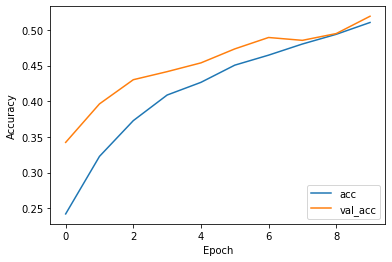

In [25]:
# Write your code here ----------
model = build_fc_model(input_shape=(32, 32, 3), num_class=10)
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
# -------------------------------
x_train, y_train, x_test, y_test = load_data_cifar10_norm()

history = model.fit(x_train, y_train, batch_size=512, epochs=10, validation_data=(x_test, y_test))

plot_history(history)
model.summary()

### Compile and train the CNN model using the above functions.

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 24s 470us/sample - loss: 4.4714 - acc: 0.2106 - val_loss: 1.8247 - val_acc: 0.3295
Epoch 2/10
50000/50000 [==============================] - 23s 469us/sample - loss: 1.6832 - acc: 0.3861 - val_loss: 1.5674 - val_acc: 0.4356
Epoch 3/10
50000/50000 [==============================] - 23s 468us/sample - loss: 1.5043 - acc: 0.4600 - val_loss: 1.4427 - val_acc: 0.4863
Epoch 4/10
50000/50000 [==============================] - 24s 473us/sample - loss: 1.4053 - acc: 0.4955 - val_loss: 1.3825 - val_acc: 0.5114
Epoch 5/10
50000/50000 [==============================] - 23s 470us/sample - loss: 1.2968 - acc: 0.5372 - val_loss: 1.3319 - val_acc: 0.5279
Epoch 6/10
50000/50000 [==============================] - 24s 473us/sample - loss: 1.2244 - acc: 0.5674 - val_loss: 1.2604 - val_acc: 0.5502
Epoch 7/10
50000/50000 [==============================] - 24s 477us/sample - loss: 1.1502 - acc: 0.5954 

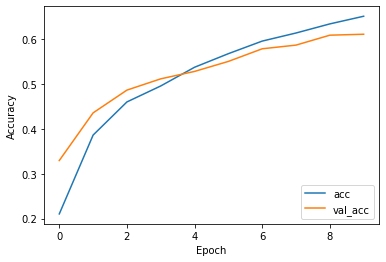

In [0]:
# Write your code here ----------
model = build_cnn_model(input_shape=(32, 32, 3), num_class=10)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# -------------------------------
x_train, y_train, x_test, y_test = load_data_cifar10_norm()
history = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_test, y_test))

plot_history(history)
model.summary()

### What do you observe? Compare both the model by looking at their Accuracy vs Epoch plot and total numbers of trainable parameters.

In [27]:
print("Even though training parameters in FC NN is more than CNN accuracy in CNN is more. Also, the FCNN is overfit and the validation accuracy is diverted from the Testing accracy  ")

Even though training parameters in FC NN is more than CNN accuracy in CNN is more. Also, the FCNN is overfit and the validation accuracy is diverted from the Testing accracy  


## Question 3: Image Classification in Tensorflow using Transfer Learning
In this we will again try to learn a classification model for **cifar10** but by using the concept of transfer learning. 

### Brief description on Transfer Learning:

The idea behind transfer learning for image classification is that when you train a model on a very large image dataset like ImageNet, then this model can effectivly serve as generic model of visual world. If you remember, a closer look at every CNN model gives you an idea that every CNN model used to have some sets of convolutional layers followed by a dense layer and finally at last a classification (output) layer. So, here the convolutional layer somewhat act as feature mapping function which maps the input image to an different dimensional space. And finally at the end you apply dense layer to classify the images based on those extracted features. <br>

**Inshort this what you do in a CNN model:**
![](https://github.com/bcs-iitk/BCS_Workshop_Apr_20/raw/master/Machine_Learning/Assignment/cnn_model.png)

So what we will do in transfer learning is that we will use some already pre-trained model which are trained on ImageNet dataset. Will only use its learned convolutional layers as a feature mapping function. And finally will learn a fully connected neural network on those features to classify the images.


### Attributes of Transfer Learning model to be build

*   Pre-trained weights of VGG16 will be used as feature extracter
*   After this flatten the output and use dense layer of **64 neurons**



In [0]:
import numpy as np
import tensorflow as tf
%tensorflow_version 1.x
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import preprocess_input, VGG16

In [0]:
def plot_history(history):
  # function to plot accuracy vs epoch

  plt.plot(history.history['acc'], label='acc')
  plt.plot(history.history['val_acc'], label = 'val_acc')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')

In [0]:
def load_data_cifar10():
  # should return the normalised cifar10 dataset by loading it from tensorflow
  # link: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/

  # Write your code here ----------
  (x_train,y_train), (x_test,y_test) = tf.keras.datasets.cifar10.load_data()

  from keras.utils import to_categorical
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)

  
  # -------------------------------

  return preprocess_input(x_train), y_train, preprocess_input(x_test), y_test

In [0]:
def build_tl_model(num_class=10):
  # should return the ccombined model using the VGG16 conv layers as conv layers
  # and for fully connected layer part use the above attributes.

  base_model = VGG16(input_shape=(32, 32, 3), include_top=False, weights='imagenet') # this is the conv layers from VGG16
  base_model.trainable = False # this ensures that while training the dense layers these weights don't get changed

  from tensorflow.python.keras.layers import Dense, Flatten

  model = tf.keras.models.Sequential()
    # Feature extractor 
  model.add(base_model)

    # Flatten and use the attribute given the question to build the dense part
    # Write your code here ----------
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dense(num_class, activation = 'softmax'))
    # -------------------------------
  

  return model

### Compile and train the model using above functions, use adam optimiser with learning rate = 0.0001

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 199s 4ms/sample - loss: 11.4595 - acc: 0.1567 - val_loss: 7.5541 - val_acc: 0.2291
Epoch 2/10
50000/50000 [==============================] - 201s 4ms/sample - loss: 5.8963 - acc: 0.2928 - val_loss: 4.9582 - val_acc: 0.3368
Epoch 3/10
50000/50000 [==============================] - 199s 4ms/sample - loss: 4.2308 - acc: 0.3678 - val_loss: 3.8813 - val_acc: 0.3857
Epoch 4/10
50000/50000 [==============================] - 199s 4ms/sample - loss: 3.3910 - acc: 0.4043 - val_loss: 3.2417 - val_acc: 0.4095
Epoch 5/10
50000/50000 [==============================] - 201s 4ms/sample - loss: 2.8568 - acc: 0.4253 - val_loss: 2.7958 - val_acc: 0.4218
Epoch 6/10
50000/50000 [==============================] - 200s 4ms/sample - loss: 2.4788 - acc: 0.4375 - val_loss: 2.4659 - val_acc: 0.4281
Epoch 7/10
50000/50000 [==============================] - 199s 4ms/sample - loss: 2.2043 - acc: 0.4474 - val_

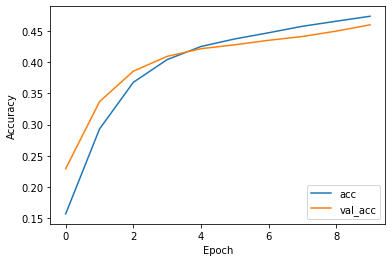

In [37]:
# Write your code here ----------
opt = tf.keras.optimizers.Adam(lr=0.0001)
model = build_tl_model(num_class=10)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
x_train, y_train, x_test, y_test = load_data_cifar10()
# -------------------------------

history = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_test, y_test))

plot_history(history)
model.summary()